In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('../3/dataset/train.csv')
for column in df.columns:
    if df.dtypes[column] == 'int64':
        continue
    df.replace(to_replace={value: index for index, value in enumerate(set(df[column]))}, inplace=True)

/tmp/ipykernel_17758/204512278.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace={value: index for index, value in enumerate(set(df[column]))}, inplace=True)
/tmp/ipykernel_17758/204512278.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace={value: index for index, value in enumerate(set(df[column]))}, inplace=True)
/tmp/ipykernel_17758/204512278.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, 

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = df.drop('income_>50K', axis=1)
Y = df['income_>50K']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test)

0.8469062784349408

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

model_1 = LogisticRegression(C=100, solver='liblinear')
model_1.fit(X_train, Y_train)

model_2 = LogisticRegression(C=0.01, solver='liblinear')
model_2.fit(X_train, Y_train)

model_3 = LogisticRegression(penalty='l2', C=0.1, solver='liblinear')
model_3.fit(X_train, Y_train)

models = [(model_1, "Модель с C=100"), (model_2, "Модель с C=0.01"), (model_3, "Модель с L2")]
for model, name in models:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(Y_train, y_train_pred)
    test_accuracy = accuracy_score(Y_test, y_test_pred)
    
    train_precision = precision_score(Y_train, y_train_pred)
    test_precision = precision_score(Y_test, y_test_pred)
    
    train_recall = recall_score(Y_train, y_train_pred)
    test_recall = recall_score(Y_test, y_test_pred)
    
    train_confusion_matrix = confusion_matrix(Y_train, y_train_pred)
    test_confusion_matrix = confusion_matrix(Y_test, y_test_pred)
    
    print(name)
    print("Правильность на обучающей выборке: {:.2f}".format(train_accuracy))
    print("Правильность на тестовой выборке: {:.2f}".format(test_accuracy))
    print("Точность на обучающей выборке: {:.2f}".format(train_precision))
    print("Точность на тестовой выборке: {:.2f}".format(test_precision))
    print("Полнота на обучающей выборке: {:.2f}".format(train_recall))
    print("Полнота на тестовой выборке: {:.2f}".format(test_recall))
    print("Матрица ошибок на обучающей выборке:\n", train_confusion_matrix)
    print("Матрица ошибок на тестовой выборке:\n", test_confusion_matrix)
    print("--------------------------------------")

Модель с C=100
Правильность на обучающей выборке: 0.82
Правильность на тестовой выборке: 0.82
Точность на обучающей выборке: 0.70
Точность на тестовой выборке: 0.71
Полнота на обучающей выборке: 0.45
Полнота на тестовой выборке: 0.43
Матрица ошибок на обучающей выборке:
 [[25185  1598]
 [ 4641  3741]]
Матрица ошибок на тестовой выборке:
 [[6277  379]
 [1216  920]]
--------------------------------------
Модель с C=0.01
Правильность на обучающей выборке: 0.82
Правильность на тестовой выборке: 0.82
Точность на обучающей выборке: 0.70
Точность на тестовой выборке: 0.71
Полнота на обучающей выборке: 0.45
Полнота на тестовой выборке: 0.43
Матрица ошибок на обучающей выборке:
 [[25192  1591]
 [ 4638  3744]]
Матрица ошибок на тестовой выборке:
 [[6276  380]
 [1213  923]]
--------------------------------------
Модель с L2
Правильность на обучающей выборке: 0.82
Правильность на тестовой выборке: 0.82
Точность на обучающей выборке: 0.70
Точность на тестовой выборке: 0.71
Полнота на обучающей выбо

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split


X = df.drop('income_>50K', axis=1)
y = df['income_>50K']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_SVC = SVC(C=1, gamma=0.2)
model_SVC.fit(X_train, y_train)

# SVC_params = {"C": [1], "gamma": [0.2]}
# SVC_grid = GridSearchCV(model_SVC, SVC_params, cv=5, n_jobs=-1)
# SVC_grid.fit(X_train, y_train)

# print("Наилучшая комбинация параметров:", SVC_grid.best_params_)

y_train_pred = model_SVC.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

y_test_pred = model_SVC.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print("Точность на обучающей выборке: {:.2f}".format(train_accuracy))
print("Точность на тестовой выборке: {:.2f}".format(test_accuracy))
print("Точность на обучающей выборке: {:.2f}".format(train_precision))
print("Точность на тестовой выборке: {:.2f}".format(test_precision))
print("Полнота на обучающей выборке: {:.2f}".format(train_recall))
print("Полнота на тестовой выборке: {:.2f}".format(test_recall))
print("Матрица ошибок на обучающей выборке:\n", train_confusion_matrix)
print("Матрица ошибок на тестовой выборке:\n", test_confusion_matrix)

Точность на обучающей выборке: 1.00
Точность на тестовой выборке: 0.76
Точность на обучающей выборке: 1.00
Точность на тестовой выборке: 0.50
Полнота на обучающей выборке: 1.00
Полнота на тестовой выборке: 0.00
Матрица ошибок на обучающей выборке:
 [[26783     0]
 [   25  8357]]
Матрица ошибок на тестовой выборке:
 [[6652    4]
 [2132    4]]


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier(criterion = 'log_loss',
                                       max_depth = 10,
                                       min_samples_leaf = 60,
                                       min_samples_split = 5
                                      )
decision_tree.fit(X_train, y_train)
y_tree_train_pred = decision_tree.predict(X_train)
y_tree_test_pred = decision_tree.predict(X_test)
print("Точность дерева на обучающих данных: {:.2f}".format(accuracy_score(y_train, y_tree_train_pred)))
print("Точность дерева на тестовых данных: {:.2f}".format(accuracy_score(y_test, y_tree_test_pred)))

knn = KNeighborsClassifier(
    leaf_size = 3,
    n_jobs = -1,
    n_neighbors = 25, 
    weights = 'uniform'
)
knn.fit(X_train, y_train)
y_knn_train_pred = knn.predict(X_train)
y_knn_test_pred = knn.predict(X_test)
print("Точность соседей на обучающих данных: {:.2f}".format(accuracy_score(y_train, y_knn_train_pred)))
print("Точность соседей на тестовых данных: {:.2f}".format(accuracy_score(y_test, y_knn_test_pred)))

Точность дерева на обучающих данных: 0.86
Точность дерева на тестовых данных: 0.86
Точность соседей на обучающих данных: 0.81
Точность соседей на тестовых данных: 0.80


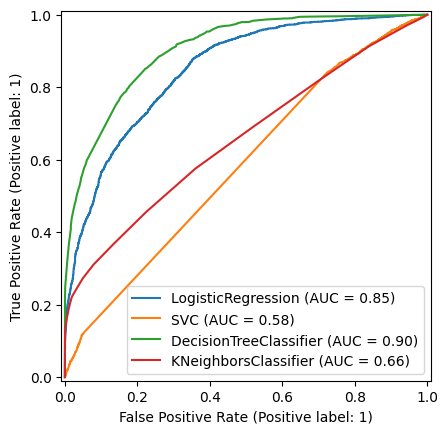

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

ax = plt.gca()

lr_disp = RocCurveDisplay.from_estimator(model_1, X_test, y_test, ax=ax)
svc_disp = RocCurveDisplay.from_estimator(model_SVC, X_test, y_test, ax=ax)
dt_disp = RocCurveDisplay.from_estimator(decision_tree, X_test, y_test, ax=ax)
knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=ax)

plt.legend(loc="lower right")
plt.show()

In [ ]:
# 1. В чем суть линейных классификаторов? Какие методы относятся к линейным классификаторам?
    # это алгоритмы, которые строят гиперплоскость (подпространство, размерность которого на 1 меньше, чем пространство, в котором она построена), 
    # разделяющую объекты разных классов
    # логистическая ерегрессия, метод опорных векторов
# 2. Что такое регуляризация?
    # введение ограниений на модель для предотвращения переобучения
# 3. Объясните назначение L1 и L2-регуляризации?
    # л1 добавляет штраф в виде суммы абсолютных значений весов модели, из-за чего некоторые значения обнуляются
    # л2 добавляет штраф в виде суммы квадратов весов модели, из-за чего снижается влияние отдельных признаков
# 4. Объясните влияние параметров С и гамма на регуляризацию модели?
    # Большее значение C увеличивает влияние каждого неправильно классифицированного образца, что делает границу решения более точной для обучающего 
    # набора, но может привести к переобучению
    # gamma определяет, насколько далеко должно распространяться влияние одного образца
# 5. Какой метод помогает подобрать лучшую комбинацию параметров?
    # поиск по сетке или случайный поиск
# 6. Что такое специфичность и чувствительность модели?
    # специфичность - доля верно классифицированных TN примеров среди всех N примеров
    # чувствительность - суть полнота (процент верно классифицированных TP среди всех P)
# 7. Как по ROC-кривой можно сравнить модели. Что означает AUC в ROC-кривой?
    # roc-кривая показывает зависимость между специфиностью и чувствительностью
    # area under curve, мера обобщающей способности модели, 1 соответствует идеальному классификатору, 0.5 - случайному